### Bring in relevant data

#### Comments for each submission (document)

In [57]:
import pickle

with open('new_reddit_topic_comments.pkl', 'rb') as pikkle:
    sub_comments = pickle.load(pikkle)

#### Submissions (documents)

In [58]:
with open('new_reddit_topics.pkl', 'rb') as pikkle2:
    sub_df = pickle.load(pikkle2)

#### Document-topic matrix

In [59]:
with open('nmf_doc_top_5_29.pkl', 'rb') as pikkle3:
    doc_top = pickle.load(pikkle3)

#### Topic list

In [60]:
with open('topic_list_5_29.pkl', 'rb') as pikkle4:
    topic_list = pickle.load(pikkle4)

### Start putting together feature matrix

In [61]:
import pandas as pd
import numpy as np

In [62]:
doc_top_mat = pd.DataFrame(doc_top)
doc_top_mat['TopicNum'] = doc_top_mat.apply(np.argmax, axis=1)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [63]:
doc_top_mat['MaxTopicWt'] = doc_top_mat.iloc[:, :15].max(axis=1)
doc_top_mat['PrimaryTopic'] = [topic_list[x] for x in doc_top_mat['TopicNum']]

In [64]:
sub_df.drop('created', axis=1, inplace=True)

In [65]:
sub_df = pd.concat([sub_df, doc_top_mat], axis=1)

In [66]:
sub_df.shape

(988, 25)

In [67]:
sub_df.head()

,author,comms_num,id,score,text,url,date_created,0,1,2,...,8,9,10,11,12,13,14,TopicNum,MaxTopicWt,PrimaryTopic
0,Cengineeringquestion,3,8n2alt,1,Writing your own letter of Rec? So the profess...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-30 00:14:49,0.013881,0.014267,0.000000,...,0.000000,0.122650,0.174294,0.000000,0.000342,0.000000,0.002942,10,0.174294,Letter_of_Recommendation
1,Saturdalia,2,8n23o7,11,Getting academic references when you're long r...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:51:51,0.032322,0.020127,0.002968,...,0.062382,0.001818,0.097441,0.000000,0.000000,0.000000,0.022731,10,0.097441,Letter_of_Recommendation
2,HoldenCoughfield,1,8n1rna,1,Applying to PhD Programs vs. Masters - Initial...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:11:21,0.000000,0.000000,0.000000,...,0.000000,0.008920,0.001835,0.003573,0.000000,0.004526,0.082262,4,0.219587,Application
3,Eldar333,1,8n1q2x,1,Contacting POIs Hey rising undergrad senior bi...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:06:06,0.027157,0.000000,0.000000,...,0.053494,0.078663,0.018131,0.003474,0.000000,0.021361,0.117501,3,0.130491,Research
4,gohgoomah,1,8n0ld0,4,Seeking application advice to MS in Mental Hea...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 20:45:47,0.000000,0.000000,0.046989,...,0.109760,0.037966,0.064394,0.061888,0.000000,0.023810,0.004044,8,0.109760,Grades


#### Check if the OP returned and thanked anyone

In [68]:
subs_and_comments = sub_df.merge(sub_comments, on='id', how='outer')

In [69]:
subs_and_comments.shape

(6007, 29)

In [70]:
subs_and_comments['op_comment'] = (subs_and_comments['author_x'] == subs_and_comments['author_y'])

In [71]:
subs_and_comments.head()

,author_x,comms_num,id,score_x,text,url,date_created,0,1,2,...,13,14,TopicNum,MaxTopicWt,PrimaryTopic,author_y,body,created,score_y,op_comment
0,Cengineeringquestion,3,8n2alt,1,Writing your own letter of Rec? So the profess...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-30 00:14:49,0.013881,0.014267,0.000000,...,0.0,0.002942,10,0.174294,Letter_of_Recommendation,riggorous,"I'm not sure what you're asking. Yes, you need...",2018-05-30 00:19:46,2.0,False
1,Cengineeringquestion,3,8n2alt,1,Writing your own letter of Rec? So the profess...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-30 00:14:49,0.013881,0.014267,0.000000,...,0.0,0.002942,10,0.174294,Letter_of_Recommendation,Cengineeringquestion,I told the head of the admissions committee (w...,2018-05-30 00:23:05,1.0,True
2,Cengineeringquestion,3,8n2alt,1,Writing your own letter of Rec? So the profess...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-30 00:14:49,0.013881,0.014267,0.000000,...,0.0,0.002942,10,0.174294,Letter_of_Recommendation,riggorous,Proceed as you would if they didn't. I don't s...,2018-05-30 00:25:40,1.0,False
3,Saturdalia,2,8n23o7,11,Getting academic references when you're long r...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:51:51,0.032322,0.020127,0.002968,...,0.0,0.022731,10,0.097441,Letter_of_Recommendation,Becroki,I was in a similar situation a couple years ag...,2018-05-30 00:30:21,5.0,False
4,Saturdalia,2,8n23o7,11,Getting academic references when you're long r...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:51:51,0.032322,0.020127,0.002968,...,0.0,0.022731,10,0.097441,Letter_of_Recommendation,riggorous,4 years is not that long and assuming you actu...,2018-05-30 01:06:38,1.0,False


In [72]:
op_add_comms = subs_and_comments[subs_and_comments['op_comment']].groupby('id')['body'].apply(lambda x: ' '.join(x)).reset_index().reset_index()

In [73]:
thanks = ['thank', 'thank you', 'thanks', 'thx', 'tyvm', 'tysm', 'good to know', 'good to hear']

In [74]:
op_add_comms['thanks'] = op_add_comms['body'].apply(lambda x: any(substring in x.lower() for substring in thanks))

In [75]:
op_add_comms.head(10)

,index,id,body,thanks
0,0,82qbc4,Thanks! My enthusiasm jumping off the screen! ...,True
1,1,82ronf,Alright. Thanks for the input. Even I was thin...,True
2,2,82s4dp,That's awesome! Good to know from someone fir...,True
3,3,82sh21,Thanks for the reply!,True
4,4,82sj6o,Interesting my school actually did sign. Thank...,True
5,5,82t325,update: it seems that I may have overreacted b...,True
6,6,82ucs1,Come April 16th.. we all need to cut ourselves...,False
7,7,82v9fu,But how would you compare the living condition...,False
8,8,82voxm,"Thanks for that. Logically I know that, it’s j...",True
9,9,82w5mu,Thank you very much! I can't wait to get there...,True


In [76]:
op_add_comms.drop('body', axis=1, inplace=True)

In [77]:
subs_and_comments = subs_and_comments.merge(op_add_comms, on='id', how='outer')

In [78]:
subs_and_comments['thanks'].fillna(False, inplace=True)

In [79]:
sub_df = sub_df.merge(op_add_comms, on='id', how='outer')

In [80]:
sub_df.head()

,author,comms_num,id,score,text,url,date_created,0,1,2,...,10,11,12,13,14,TopicNum,MaxTopicWt,PrimaryTopic,index,thanks
0,Cengineeringquestion,3,8n2alt,1,Writing your own letter of Rec? So the profess...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-30 00:14:49,0.013881,0.014267,0.000000,...,0.174294,0.000000,0.000342,0.000000,0.002942,10,0.174294,Letter_of_Recommendation,560.0,False
1,Saturdalia,2,8n23o7,11,Getting academic references when you're long r...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:51:51,0.032322,0.020127,0.002968,...,0.097441,0.000000,0.000000,0.000000,0.022731,10,0.097441,Letter_of_Recommendation,NaN,NaN
2,HoldenCoughfield,1,8n1rna,1,Applying to PhD Programs vs. Masters - Initial...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:11:21,0.000000,0.000000,0.000000,...,0.001835,0.003573,0.000000,0.004526,0.082262,4,0.219587,Application,NaN,NaN
3,Eldar333,1,8n1q2x,1,Contacting POIs Hey rising undergrad senior bi...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:06:06,0.027157,0.000000,0.000000,...,0.018131,0.003474,0.000000,0.021361,0.117501,3,0.130491,Research,NaN,NaN
4,gohgoomah,1,8n0ld0,4,Seeking application advice to MS in Mental Hea...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 20:45:47,0.000000,0.000000,0.046989,...,0.064394,0.061888,0.000000,0.023810,0.004044,8,0.109760,Grades,NaN,NaN


In [81]:
sub_df['thanks'].fillna(False, inplace=True)

In [82]:
sub_df.head()

,author,comms_num,id,score,text,url,date_created,0,1,2,...,10,11,12,13,14,TopicNum,MaxTopicWt,PrimaryTopic,index,thanks
0,Cengineeringquestion,3,8n2alt,1,Writing your own letter of Rec? So the profess...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-30 00:14:49,0.013881,0.014267,0.000000,...,0.174294,0.000000,0.000342,0.000000,0.002942,10,0.174294,Letter_of_Recommendation,560.0,False
1,Saturdalia,2,8n23o7,11,Getting academic references when you're long r...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:51:51,0.032322,0.020127,0.002968,...,0.097441,0.000000,0.000000,0.000000,0.022731,10,0.097441,Letter_of_Recommendation,NaN,False
2,HoldenCoughfield,1,8n1rna,1,Applying to PhD Programs vs. Masters - Initial...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:11:21,0.000000,0.000000,0.000000,...,0.001835,0.003573,0.000000,0.004526,0.082262,4,0.219587,Application,NaN,False
3,Eldar333,1,8n1q2x,1,Contacting POIs Hey rising undergrad senior bi...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 23:06:06,0.027157,0.000000,0.000000,...,0.018131,0.003474,0.000000,0.021361,0.117501,3,0.130491,Research,NaN,False
4,gohgoomah,1,8n0ld0,4,Seeking application advice to MS in Mental Hea...,https://www.reddit.com/r/gradadmissions/commen...,2018-05-29 20:45:47,0.000000,0.000000,0.046989,...,0.064394,0.061888,0.000000,0.023810,0.004044,8,0.109760,Grades,NaN,False


### Submission (document) characteristics

#### Length

In [83]:
sub_df['sub_len'] = [len(x.split(' ')) for x in sub_df['text']]

#### Sentiment

In [84]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [85]:
def sentiment_scores(doc):
    snt = analyser.polarity_scores(doc)
    return snt

In [86]:
blah = sub_df['text'].apply(sentiment_scores)

In [87]:
neg = [x['neg'] for x in blah]
pos = [x['pos'] for x in blah]
neu = [x['neu'] for x in blah]
snt = [x['compound'] for x in blah]
op_sent = pd.DataFrame({'usr_neg': neg, 'usr_pos': pos, 'usr_neu': neu, 'usr_snt': snt})

In [88]:
sub_df = pd.concat([sub_df, op_sent], axis=1)

#### Time posted

In [89]:
from datetime import datetime, timedelta

In [90]:
sub_df.iloc[0]['date_created'].to_datetime()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  exec(code_obj, self.user_global_ns, self.user_ns)


datetime.datetime(2018, 5, 30, 0, 14, 49)

In [91]:
imp_date = datetime(2018, 4, 15, 23, 59, 59)

In [92]:
sub_df['time_from_deadline'] = [(x-imp_date).total_seconds() for x in sub_df['date_created']]

### Add user features

In [93]:
with open('op_attr.pkl', 'rb') as picle:
    op_attr = pickle.load(picle)
sub_df = pd.concat([sub_df, op_attr], axis=1)

### FInally make feature matrix and filter out non-questions and too recent posts (done manually)

In [94]:
class_test = sub_df[(sub_df['text'].str.find('?') != -1)].reset_index()

In [95]:
class_test.shape

(848, 36)

In [96]:
class_test =  class_test.iloc[19:, :]

In [97]:
class_test.shape

(829, 36)

In [98]:
class_test['thanks'].value_counts(normalize=True)

False    0.646562
True     0.353438
Name: thanks, dtype: float64

In [99]:
class_test.groupby('PrimaryTopic').sum()[['thanks']]

,thanks
PrimaryTopic,
Admissions1,26.0
Admissions2,8.0
Application,15.0
CS_Math,11.0
GRE,33.0
Grades,22.0
Interview,13.0
Letter_of_Recommendation,19.0
Offer,20.0


#### Feature matrices broken down by the topics and user and document features.

In [100]:
topicfeat = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
usrfeat = ['op_age', 'op_karma']
docfeat = ['sub_len', 'usr_snt', 'time_from_deadline']

In [101]:
allfeat = topicfeat + usrfeat + docfeat
X_main = class_test[allfeat]

In [103]:
y_main = [int(x) for x in class_test['thanks']]

### Compare all models

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

import math
import matplotlib.pyplot as plt

In [105]:
plt.style.use('fivethirtyeight')

In [119]:
def get_fits(model, split, features, response):
        
    idx = math.ceil(1-(split/100) * len(features))
    Xtrain = features.iloc[idx:, :]
    ytrain = response[idx:]
    Xtest = features.iloc[:idx, :]
    ytest = response[:idx]
    #print(len(ytest))
    
    sc = preprocessing.StandardScaler()
    Xtrain = sc.fit_transform(Xtrain)

    clf = model.fit(Xtrain, ytrain)      
    ypred = clf.predict(Xtrain)    
    rec_tr = metrics.recall_score(ytrain, ypred)
    
    Xtest = sc.transform(Xtest)
    ypred2 = clf.predict(Xtest)
    TN, FP, FN, TP = confusion_matrix(ytest, ypred2).ravel()
    rec = metrics.recall_score(ytest, ypred2)

    coefs = model.coef_
    
    return rec, rec_tr, TP, TN, FP, FN, coefs

In [120]:
def get_all_lr_results(split, features, response):
    rec = []
    spec = []
    sp_re = []

    TPs = []
    FPs =[]
    TNs = []
    FNs = []

    coefs=[]
    
    lr = LogisticRegression(class_weight='balanced')
    for n in range(len(split)):
        rec_lr, rectr_lr, TP, TN, FP, FN, coef = get_fits(lr, split[n], features, response)

        rec.append(rec_lr)        
        spec_lr = TN/(FP+TN)
        spec.append(spec_lr)
        sp_re.append((2*spec_lr*rec_lr)/(spec_lr+rec_lr))
        
        TPs.append(TP)
        FPs.append(FP)
        TNs.append(TN)
        FNs.append(FN)
    
    return rec, spec, sp_re, TPs, FPs, TNs, FNs

In [121]:
cols = [topicfeat, topicfeat+docfeat, topicfeat+usrfeat, topicfeat+docfeat+usrfeat]

In [122]:
holdout_idx = math.ceil(.15*len(X_main))

In [123]:
split = list(range(65, 86, 1))

In [124]:
specrecf1 = []

In [125]:
for col in cols:
    X = X_main[col]
    y = y_main
    
    X = X.iloc[holdout_idx:, :]
    y = y[holdout_idx:]
    
    rec, spec, sp_re, TPs, FPs, TNs, FNs = get_all_lr_results(split, X, y)
    
    specrecf1.append(sp_re)

In [126]:
models = ['Top', 'TopDoc', 'TopOP', 'All']
sp_re_df = (pd.DataFrame(specrecf1)).T

In [128]:
sp_re_df.columns = models

Text(0,0.5,'Score')

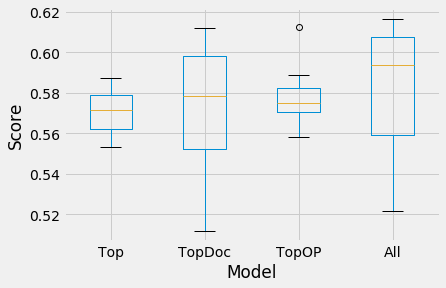

In [129]:
sp_re_df.boxplot()
plt.xlabel('Model')
plt.ylabel('Score')

### Threshold Tuning

In [130]:
cols_final = topicfeat + usrfeat + docfeat

In [131]:
Xholdout = X_main.iloc[:holdout_idx,:]
yholdout = y_main[:holdout_idx]

In [132]:
Xholdout = Xholdout[cols_final]

In [134]:
Xfinal = X_main.iloc[holdout_idx:, :][cols_final]
yfinal = y_main[holdout_idx:]

In [135]:
lr = LogisticRegression(class_weight='balanced')
sc = preprocessing.StandardScaler()
Xfinal = sc.fit_transform(Xfinal)
clf = lr.fit(Xfinal, yfinal) 

In [136]:
def eval_fits_by_thresh(clf, scaler, features, response, thresh):
    X = sc.fit_transform(features)   
    ypred = clf.predict_proba(X)[:,1] > thresh/100  
    
    rec = metrics.recall_score(response, ypred)    
    TN, FP, FN, TP = confusion_matrix(response, ypred).ravel()
    spec = TN/(TN+FP)
    sp_rec = (2*rec*spec)/(rec+spec)

    coefs = lr.coef_
    
    return rec, spec, sp_rec, coefs, ypred

In [137]:
recs = []
coef = []
specs = []
sp_rec = []

t = list(range(40, 61, 1))

In [139]:
for n in t:
    rec, spec, sp_re, coefs, ypred = eval_fits_by_thresh(clf, sc, Xholdout, yholdout, n)
    
    recs.append(rec)
    specs.append(spec)
    sp_rec.append(sp_re)

In [140]:
recs

[0.9210526315789473,
 0.8947368421052632,
 0.8947368421052632,
 0.868421052631579,
 0.868421052631579,
 0.868421052631579,
 0.8421052631578947,
 0.7894736842105263,
 0.7631578947368421,
 0.7105263157894737,
 0.6578947368421053,
 0.6052631578947368,
 0.5789473684210527,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5,
 0.42105263157894735,
 0.39473684210526316,
 0.39473684210526316]

In [141]:
sp_rec

[0.4245640636846095,
 0.48571428571428565,
 0.5213224724484906,
 0.5390343502282009,
 0.5709609539396773,
 0.6109731316324227,
 0.6319569120287254,
 0.6414922656960874,
 0.6703711935985776,
 0.6817275747508306,
 0.6622516556291391,
 0.644709180098108,
 0.6294706723891274,
 0.6095791001451378,
 0.6327372764786796,
 0.6434316353887399,
 0.6468763845813026,
 0.6266094420600858,
 0.5607297167546808,
 0.5415162454873647,
 0.5459702198061923]

In [142]:
np.argmax(sp_rec)

9

In [143]:
t[np.argmax(sp_rec)]

49

### Final scoring

In [158]:
rec, spec, sp_re, coefs, ypred = eval_fits_by_thresh(clf, sc, X_main, y_main, t[np.argmax(sp_rec)])

In [159]:
rec

0.6245733788395904

In [160]:
spec

0.6082089552238806

In [161]:
sp_re

0.6162825532266563

In [162]:
import itertools
def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Blues):
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.xticks(range(0,2))
    plt.yticks(range(0,2))
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [164]:
cm = confusion_matrix(y_main, ypred)

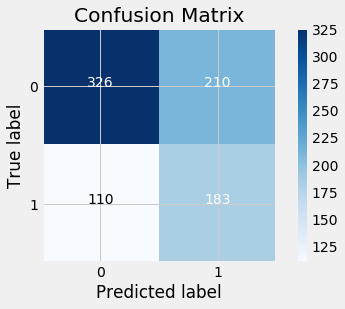

In [165]:
plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Blues)

### Final coefficients

In [166]:
a = list(topic_list.values())
a.extend(usrfeat + docfeat)
zipped = zip(a, np.ravel(coefs))
#zipped = zip(topic_list.values(), np.ravel(coefs))
coef = sorted(list(zipped), key=lambda tup: abs(tup[1]), reverse=True)
coef

[('GRE', 0.30757617600329834),
 ('sub_len', 0.2505020421718623),
 ('Programs3', 0.1832337781977057),
 ('Admissions2', -0.10314935291680062),
 ('time_from_deadline', -0.09191406479878508),
 ('Admissions1', 0.09024864279839898),
 ('Application', 0.08998860511196465),
 ('Offer', -0.08827709784060653),
 ('CS_Math', -0.07689971095853625),
 ('Schools2', 0.0757457390666576),
 ('op_age', 0.06762251887242196),
 ('Interview', 0.06453400339595265),
 ('Letter_of_Recommendation', 0.061962896543053925),
 ('Programs2', -0.051217273584519066),
 ('usr_snt', 0.0427649516759489),
 ('Programs1', 0.03657818102394301),
 ('Grades', 0.03528856849158669),
 ('Schools1', -0.00944766202276889),
 ('Research', 0.004854184511581987),
 ('op_karma', 0.0034765050632698303)]

([<matplotlib.axis.YTick at 0x1a1ca9cef0>,
 <a list of 20 Text yticklabel objects>)

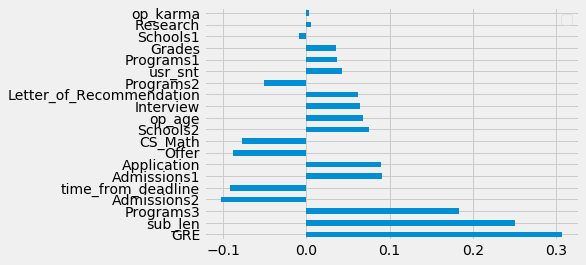

In [167]:
coef_df = pd.DataFrame.from_records(coef)
coef_df.plot.barh()
plt.legend([])
plt.yticks(range(0, len(coef_df)), coef_df[0])

In [168]:
coef_df

,0,1
0,GRE,0.307576
1,sub_len,0.250502
2,Programs3,0.183234
3,Admissions2,-0.103149
4,time_from_deadline,-0.091914
5,Admissions1,0.090249
6,Application,0.089989
7,Offer,-0.088277
8,CS_Math,-0.076900
9,Schools2,0.075746
